In [52]:
import xarray as xr
import numpy as np
# from scipy.io import loadmat
from cmocean import cm
import matplotlib.pyplot as plt
import netCDF4 as nc
#from mpl_toolkits.basemap import Basemap

# import cartopy
# from cartopy import crs, feature
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# from matplotlib.patches import Rectangle
#import LambertConformalTicks as lct

%matplotlib inline

## make a lat-lon based mask with netcdf (tereza is janky but it works)

In [53]:
## Let's get out the grid and the mask

# grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

lats = mask['nav_lat'][:]
lons = mask['nav_lon'][:]

print(np.shape(lats))

### let's grab some data, in this case phytoplankton
date = '01apr16'
daten = '20160401'

phyt = nc.Dataset(f'/results2/SalishSea/hindcast.201905/{date}/SalishSea_1h_{daten}_{daten}_ptrc_T.nc')

#get out surface diatoms
diatoms = phyt['diatoms'][0,0,:,:]



(898, 398)


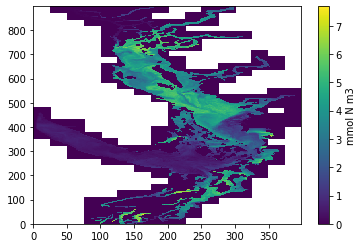

In [54]:
plt.pcolormesh(diatoms)
plt.colorbar(label = 'mmol N m3')

In [55]:
## let's mask out some lats, lons via some conditions. this is JANKY? but it works"

below_texada_mask = (((lats > 49.2) & (lats < 49.5)) & (lons > -124.2) & (lons < -124))

print('mean diatoms at this mask')
print(np.nanmean(diatoms[below_texada_mask]))

#### let's set  diatoms at this mask to 10 to see if we can see it

diatoms[below_texada_mask] = 10

#d

mean diatoms at this mask
3.8554378


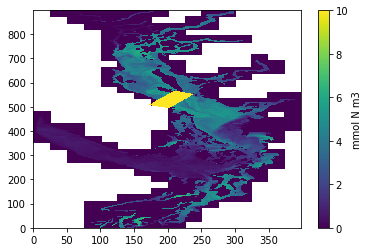

In [56]:
plt.pcolormesh(diatoms)
plt.colorbar(label = 'mmol N m3')

### redo it to use xarray


In [57]:
## Let's get out the grid and the mask

# grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
tmask = xr.open_dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

lats = tmask['nav_lat'][:]
lons = tmask['nav_lon'][:]

print(np.shape(lats))

### let's grab some data, in this case phytoplankton
date = '01apr16'
daten = '20160401'

tphyt = xr.open_dataset(f'/results2/SalishSea/hindcast.201905/{date}/SalishSea_1h_{daten}_{daten}_ptrc_T.nc')

#get out surface diatoms
tdiatoms = tphyt['diatoms'][0,0,:,:]

(898, 398)


diatoms masked, using xarray syntax
3.8554378


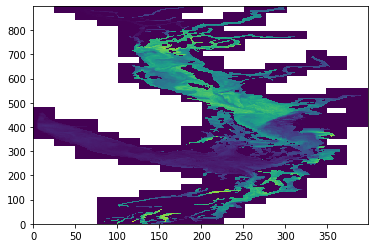

In [58]:
## let's mask out some lats, lons via some conditions. this is JANKY? but it works"

mask = (lats > 49.2) & (lats < 49.5) & (lons > -124.2) & (lons < -124)
masked_diat = tdiatoms.where(mask)
print('diatoms masked, using xarray syntax')
print(np.nanmean(masked_diat))

plt.pcolormesh(tdiatoms)

## using xarray I can't figure out how to set the area under certain mask to a given value (as I did above in the netcdf example case). but for averaging using masks, this works (and gives the same answer as above)